In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy as sy
sy.init_printing() 

In [29]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [30]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

# <font face="gotham" color="purple"> The Gram-Schmidt Process

The _Gram-Schmidt Process_ is an algorithm of producing an orthogonal or orthonormal basis.

## <font face="gotham" color="purple"> An Example in $\mathbb{R}^3$

 Let  $W=\operatorname{Span}\left\{\mathbf{x}_{1}, \mathbf{x}_{2}, \mathbf{x}_{3}\right\}$, where
$$ 
\mathbf{x}_{1}=\left[\begin{array}{l}
3 \\
6 \\
2
\end{array}\right] \text {, } \mathbf{x}_{2}=\left[\begin{array}{l}
1 \\
2 \\
4
\end{array}\right]\text {, and }\mathbf{x}_{3}=\left[\begin{array}{l}
2 \\
-2 \\
1
\end{array}\right]
$$.
They are not orthogonal, but we can construct an orthogonal basis $\{\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3\}$ for $W$ based on $\left\{\mathbf{x}_{1}, \mathbf{x}_{2}, \mathbf{x}_{3}\right\}$. We will visualize the process.

First we plot the $W=\operatorname{Span}\left\{\mathbf{x}_{1}, \mathbf{x}_{2},\mathbf{x}_{3}\right\}$.

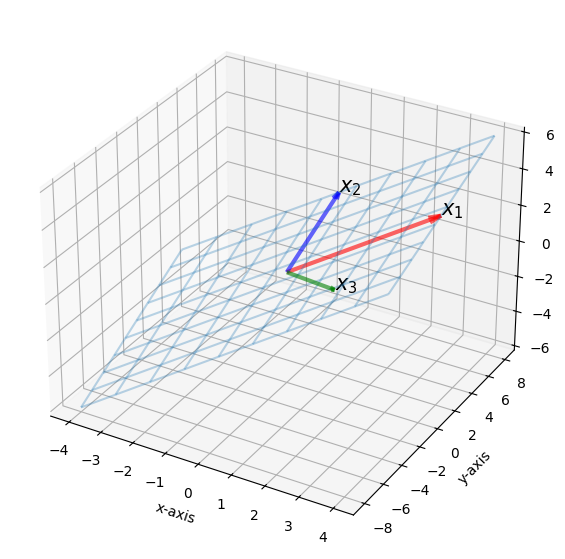

In [31]:
######################## Subspace W ##############################
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

vec = np.array([[[0,0,0,3, 6, 2]],
             [[0,0,0,1, 2, 4]],
             [[0,0,0,2, -2, 1]]])

X = vec[0,:,3] * S + vec[1,:,3] * T
Y = vec[0,:,4] * S + vec[1,:,4] * T
Z = vec[0,:,5] * S + vec[1,:,5] * T

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, alpha = .3)

############################# x1 and x2 ##############################
colors = ['r','b','g']
s = ['$x_1$', '$x_2$', '$x_3$']
for i in range(vec.shape[0]):
    X,Y,Z,U,V,W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False,
              color = colors[i], alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3)
    ax.text(vec[i,:,3][0], vec[i,:,4][0], vec[i,:,5][0], s = s[i], size = 15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

If we choose $\mathbf{v}_1= \mathbf{x}_1$, then the orthogonal component of projection of $\mathbf{x}_2$ onto $\mathbf{v}_1$ is $\mathbf{v}_2$.

Define $\text{Proj}_{\mathbf{v}_1}\mathbf{x}_2 = \alpha \mathbf{x}_1$, then $(\mathbf{x}_2 - \alpha \mathbf{x}_1)\cdot \mathbf{x}_1 = 0$, rearange for $\alpha$

$$
\alpha = \frac{\mathbf{x}_2^T\mathbf{x}_1}{\mathbf{x}_1^T\mathbf{x}_1}
$$

According to definition above

$$
\text{Proj}_{\mathbf{v}_1}\mathbf{x}_2 = \alpha \mathbf{x}_1 = \frac{\mathbf{x}_2^T\mathbf{x}_1}{\mathbf{x}_1^T\mathbf{x}_1}\mathbf{x}_1
$$

The orthogonal component, $\mathbf{v}_2$ is 

$$
\mathbf{x}_2- \text{Proj}_{\mathbf{v}_1}\mathbf{x}_2 =\mathbf{x}_2 - \frac{\mathbf{x}_2^T\mathbf{x}_1}{\mathbf{x}_1^T\mathbf{x}_1}\mathbf{x}_1
$$

In [32]:
x2 = np.array([1, 2, 4])
x1 = np.array([3, 6, 2])
v2 = x2 - (x2@x1)/(x1@x1)*x1;v2

array([-0.408, -0.816,  3.061])

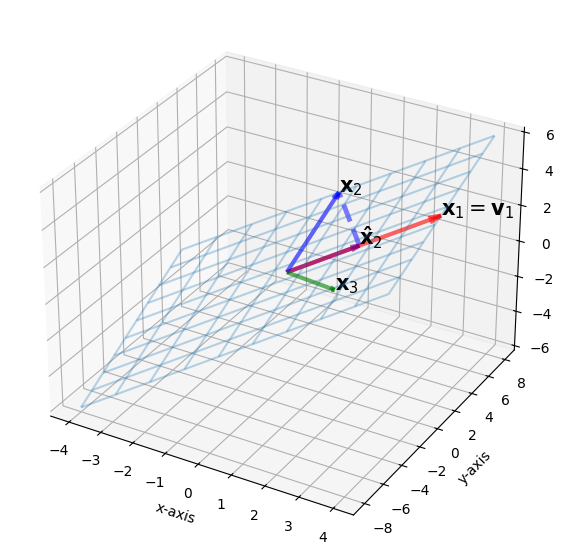

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

######################## Subspace W ##############################

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

x1 = np.array([3, 6, 2])
x2 = np.array([1, 2, 4])
x3 = np.array([2, -2, 1])
v1 = x1
v2 = x2

X = x1[0] * S + x2[0] * T
Y = x1[1] * S + x2[1] * T
Z = x1[2] * S + x2[2] * T

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth=1.5, alpha=0.3)

############################# x1, x2, v2, alpha*v1 ##############################

vec = np.array([[0, 0, 0, x1[0], x1[1], x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color='red', alpha=0.6, arrow_length_ratio=0.08, pivot='tail',
          linestyles='solid', linewidths=3)

vec = np.array([[0, 0, 0, x2[0], x2[1], x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color='blue', alpha=0.6, arrow_length_ratio=0.08, pivot='tail',
          linestyles='solid', linewidths=3)

vec = np.array([[0, 0, 0, x3[0], x3[1], x3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color='green', alpha=0.6, arrow_length_ratio=0.08, pivot='tail',
          linestyles='solid', linewidths=3)

alpha = (x2 @ x1) / (x1 @ x1)

vec = np.array([[0, 0, 0, alpha * x1[0], alpha * x1[1], alpha * x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color='purple', alpha=0.6, arrow_length_ratio=0.12, pivot='tail',
          linestyles='solid', linewidths=3)

ax.text(x1[0], x1[1], x1[2], r'$\mathbf{x}_1 = \mathbf{v}_1 $', size=15)
ax.text(x2[0], x2[1], x2[2], r'$\mathbf{x}_2$', size=15)
ax.text(x3[0], x3[1], x3[2], r'$\mathbf{x}_3$', size=15)
ax.text(alpha * x1[0], alpha * x1[1], alpha * x1[2], r'$\mathbf{\hat{x}}_2$', size=15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

################################# Dashed Line ##################################

point1 = [alpha * x1[0], alpha * x1[1], alpha * x1[2]]
point2 = [x2[0], x2[1], x2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:, 0], line1[:, 1], line1[:, 2], c='b', lw=3.5, alpha=0.5, ls='--')

point1 = [x2[0], x2[1], x2[2]]
point2 = [v2[0], v2[1], v2[2]]
line2 = np.array([point1, point2])
ax.plot(line2[:, 0], line2[:, 1], line2[:, 2], c='b', lw=3.5, alpha=0.5, ls='--')

plt.show()


Next step, we find $\mathbf{v}_3$, define $W = \text{Span}\{\mathbf{v}_1, \mathbf{v}_2\}$

$$
\mathbf{x}_3- \text{Proj}_{W}\mathbf{x}_3 =\mathbf{x}_3 - \frac{\mathbf{x}_3^T\mathbf{v}_1}{\mathbf{v}_1^T\mathbf{v}_1}\mathbf{v}_1-\frac{\mathbf{x}_3^T\mathbf{v}_2}{\mathbf{v}_2^T\mathbf{v}_2}\mathbf{v}_2
$$

Again, the codes are superfluous, yet exceedingly intuitive.

In [34]:
x3 = np.array([2, -2, 1])
projW_x3 = (x3@v1)/(v1@v1)*v1 + (x3@v2)/(v2@v2)*v2
v3 = x3 - projW_x3; v3

array([ 2.15 , -1.701,  0.782])

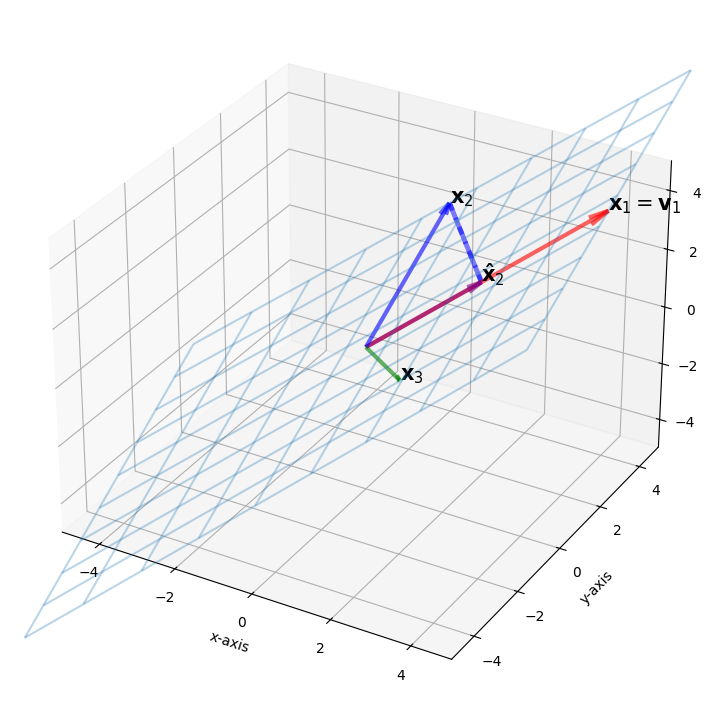

In [35]:


######################## Subspace W ##############################

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

x1 = np.array([3, 6, 2])
x2 = np.array([1, 2, 4])
x3 = np.array([2, -2, 1])

X = x1[0] * S + x2[0] * T
Y = x1[1] * S + x2[1] * T
Z = x1[2] * S + x2[2] * T

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth=1.5, alpha=0.3)

############################# x1, x2, x3, alpha*x1 ##############################

vec = np.array([[0, 0, 0, x1[0], x1[1], x1[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color='red', alpha=0.6, arrow_length_ratio=0.08, pivot='tail',
          linestyles='solid', linewidths=3)

vec = np.array([[0, 0, 0, x2[0], x2[1], x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color='blue', alpha=0.6, arrow_length_ratio=0.08, pivot='tail',
          linestyles='solid', linewidths=3)

vec = np.array([[0, 0, 0, x3[0], x3[1], x3[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color='green', alpha=0.6, arrow_length_ratio=0.08, pivot='tail',
          linestyles='solid', linewidths=3)

alpha = (x2 @ x1) / (x1 @ x1)
projW_x2 = alpha * x1

vec = np.array([[0, 0, 0, projW_x2[0], projW_x2[1], projW_x2[2]]])
X, Y, Z, U, V, W = zip(*vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color='purple', alpha=0.6, arrow_length_ratio=0.12, pivot='tail',
          linestyles='solid', linewidths=3)

ax.text(x1[0], x1[1], x1[2], r'$\mathbf{x}_1 = \mathbf{v}_1$', size=15)
ax.text(x2[0], x2[1], x2[2], r'$\mathbf{x}_2$', size=15)
ax.text(x3[0], x3[1], x3[2], r'$\mathbf{x}_3$', size=15)
ax.text(projW_x2[0], projW_x2[1], projW_x2[2], r'$\mathbf{\hat{x}}_2$', size=15)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

################################# Dashed Line ##################################

point1 = projW_x2
point2 = x2
line1 = np.array([point1, point2])
ax.plot(line1[:, 0], line1[:, 1], line1[:, 2], c='b', lw=3.5, alpha=0.5, ls='--')

point1 = x2
point2 = projW_x2
line2 = np.array([point1, point2])
ax.plot(line2[:, 0], line2[:, 1], line2[:, 2], c='b', lw=3.5, alpha=0.5, ls='--')

################################ Axes ######################################
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)

plt.show()


Now we have orthogonal basis $\{\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3\}$, and futher we can normalize them.The column of $U$ is a set of orthonormal basis.

In [36]:
v1 = x1
u1 = v1/sp.linalg.norm(v1)
u2 = v2/sp.linalg.norm(v2)
u3 = v3/sp.linalg.norm(v3)

U = np.vstack((u1, u2, u3)).T
U

array([[ 0.429,  0.218,  0.754],
       [ 0.857,  0.436, -0.597],
       [ 0.286,  0.873,  0.274]])

In [37]:
U.T@U

array([[ 1.   ,  0.717, -0.11 ],
       [ 0.717,  1.   ,  0.144],
       [-0.11 ,  0.144,  1.   ]])

We can also use SymPy built-in algorithm ```orthogonalize``` or ```GramSchmidt```, for Gram-Schmidt process.

## <font face="gotham" color="purple"> SymPy Functions for Gram-Schimidt Process

We need to prepare all the vectors in a form

$$
L = [\mathbf v_1,\ \mathbf v_2,\ ...,\ \mathbf v_n]
$$

where $\mathbf v_i, i\in (1,2,...n)$ is a column vector.

In [38]:
# Define the vectors
x1 = [3, 6, 2]
x2 = [1, 2, 4]
x3 = [2, -2, 1]

# Create the list of matrices
L = [sy.Matrix(x1).T, sy.Matrix(x2).T, sy.Matrix(x3).T]

# Perform Gram-Schmidt process
ort = sy.GramSchmidt(L)
ort_norm = sy.GramSchmidt(L, orthonormal=True)

# Display the results
print("Orthogonal basis:")
for vec in ort:
    print(vec)

print("\nOrthonormal basis:")
for vec in ort_norm:
    print(vec)

Orthogonal basis:
Matrix([[3, 6, 2]])
Matrix([[-20/49, -40/49, 150/49]])
Matrix([[12/5, -6/5, 0]])

Orthonormal basis:
Matrix([[3/7, 6/7, 2/7]])
Matrix([[-2*sqrt(5)/35, -4*sqrt(5)/35, 3*sqrt(5)/7]])
Matrix([[2*sqrt(5)/5, -sqrt(5)/5, 0]])


# <font face="gotham" color="purple"> The QR Decomposition

QR decomposition is commonly used for solving linear systems and is also very popular for least squares solutions. QR decomposition is based on the Gram-Schmidt process we just discussed.

Consider two matrices:

$$A=\left[\mathbf{a}_{1}, \ldots, \mathbf{a}_{n}\right] \quad \text{and} \quad Q=\left[\mathbf{u}_{1}, \ldots, \mathbf{u}_{n}\right]$$

where $Q$ is the orthonormalized version of $A$. We define $R$ as $Q^T A$:

$$R=\left[\begin{array}{ccccc}
\mathbf{u}_{1}^T \mathbf{a}_{1} & \mathbf{u}_{1}^T \mathbf{a}_{2} & \mathbf{u}_{1}^T \mathbf{a}_{3} & \dots & \mathbf{u}_{1}^T \mathbf{a}_{n} \\
0 & \mathbf{u}_{2}^T \mathbf{a}_{2} & \mathbf{u}_{2}^T \mathbf{a}_{3} & \dots & \mathbf{u}_{2}^T \mathbf{a}_{n} \\
0 & 0 & \mathbf{u}_{3}^T \mathbf{a}_{3} & \dots & \mathbf{u}_{3}^T \mathbf{a}_{n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & \mathbf{u}_{n}^T \mathbf{a}_{n}
\end{array}\right]$$

Since $Q$ is an orthonormal matrix, we have:

$$
A = QR
$$

Try not to use $QR$ decomposition in SymPy directly, here we convert fraction into float with ```sy.N()``` and round it with ```round_expr```.

In [45]:
    
def gram_schmidt(X):
    """
    Performs QR decomposition of matrix X using the Gram-Schmidt process.
    Returns matrices Q and R such that X = QR.
    """
    n, m = X.shape
    Q = np.zeros((n, m))
    R = np.zeros((m, m))

    for j in range(m):
        v = X[:, j]
        for i in range(j):
            q = Q[:, i]
            R[i, j] = np.dot(q, v)
            v = v - R[i, j] * q
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

def solve_linear_regression(X, y):
    """
    Solves the linear regression problem using QR decomposition.
    """
    Q, R = gram_schmidt(X)
    # Compute Q^T y
    Qt_y = np.dot(Q.T, y)
    # Solve R beta = Q^T y using back substitution
    beta = np.zeros(R.shape[1])
    for i in reversed(range(R.shape[1])):
        beta[i] = (Qt_y[i] - np.dot(R[i, i+1:], beta[i+1:])) / R[i, i]
    return beta

# Example usage
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])
y = np.array([6, 5, 7, 10])

beta = solve_linear_regression(X, y)
print("Coefficients:", beta)


Coefficients: [3.5 1.4]


# <font face="gotham" color="purple"> The Least-Squares Problem

We are not delving deeply into this topic at the moment, as we will revisit it multiple times. For those who have not studied linear regression or econometrics, it suffices to know that least-squares solutions involve finding a coordinate $\beta$ for the basis of $\text{Col}X$, which forms a linear combination of $\hat{y}$.

$\hat{y}$ is the orthogonal projection of $y$ onto $\text{Col}X$, denoted as $\hat{y} = \text{proj}_{\text{Col}X}y$.

The distance between $y$ and $\hat{y}$ is the shortest among all possible $\|y - X\beta \|$ in the vector space, meaning that

$$
\|y - X\hat{\beta}\| \leq \|y - X\beta \|
$$

The $\text{Col}X$ is orthogonal to the component of the orthogonal projection of $y$, thus

\begin{align}
X^T(y - X\hat{\beta}) &= 0 \\
X^Ty &= X^TX\hat{\beta} \\
\hat{\beta} &= (X^TX)^{-1}X^Ty 
\end{align}